# Riskfolio-Lib Tutorial: 
<br><a href="https://www.kqzyfj.com/click-101359873-15150084?url=https%3A%2F%2Flink.springer.com%2Fbook%2F9783031843037" target="_blank">
        <button style="padding:10px 20px; font-size:16px; background-color: #FFA500; color:white; border:none; border-radius:5px; cursor:pointer;">
            Buy Advanced Portfolio Optimization Book on Springer
        </button>
    </a>
<br>
<br><a href='https://ko-fi.com/B0B833SXD' target='_blank'><img height='36' style='border:0px;height:36px;' src='https://cdn.ko-fi.com/cdn/kofi1.png?v=2' border='0' alt='Buy Me a Coffee at ko-fi.com' /></a> 
<br>
<br>__[Financionerioncios](https://financioneroncios.wordpress.com)__
<br>__[Orenji](https://www.linkedin.com/company/orenj-i)__
<br>__[Riskfolio-Lib](https://riskfolio-lib.readthedocs.io/en/latest/)__
<br>__[Dany Cajas](https://www.linkedin.com/in/dany-cajas/)__

## Tutorial 30: Nested Clustered Optimization (NCO)

## 1. Downloading the data:

In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import warnings

warnings.filterwarnings("ignore")
pd.options.display.float_format = '{:.4%}'.format

# Date range
start = '2016-01-01'
end = '2019-12-30'

# Tickers of assets
assets = ['JCI', 'TGT', 'CMCSA', 'CPB', 'MO', 'APA', 'MMC', 'JPM',
          'ZION', 'PSA', 'BAX', 'BMY', 'LUV', 'PCAR', 'TXT', 'TMO',
          'DE', 'MSFT', 'HPQ', 'SEE', 'VZ', 'CNP', 'NI', 'T', 'BA']
assets.sort()

# Downloading data
data = yf.download(assets, start = start, end = end, auto_adjust=False)
data = data.loc[:,('Adj Close', slice(None))]
data.columns = assets

[*********************100%***********************]  25 of 25 completed


In [2]:
# Calculating returns

Y = data[assets].pct_change().dropna()

display(Y.head())

,APA,BA,BAX,BMY,CMCSA,CNP,CPB,DE,HPQ,JCI,...,NI,PCAR,PSA,SEE,T,TGT,TMO,TXT,VZ,ZION
Date,,,,,,,,,,,,,,,,,,,,,
2016-01-05,-2.0256%,0.4057%,0.4036%,1.9693%,0.0180%,0.9305%,0.3678%,0.5784%,0.9483%,-1.1953%,...,1.5881%,0.0212%,2.8236%,0.9758%,0.6987%,1.7539%,-0.1730%,0.2410%,1.3734%,-1.0857%
2016-01-06,-11.4864%,-1.5879%,0.2411%,-1.7557%,-0.7727%,-1.2473%,-0.1736%,-1.1239%,-3.5867%,-0.9551%,...,0.5547%,0.0212%,0.1592%,-1.5647%,0.3108%,-1.0155%,-0.7653%,-3.0048%,-0.9034%,-2.9144%
2016-01-07,-5.1389%,-4.1922%,-1.6573%,-2.7699%,-1.1046%,-1.9769%,-1.2206%,-0.8855%,-4.6059%,-2.5394%,...,-2.2066%,-3.0309%,-1.0410%,-3.1557%,-1.6148%,-0.2700%,-2.2845%,-2.0570%,-0.5492%,-3.0019%
2016-01-08,0.2736%,-2.2705%,-1.6037%,-2.5425%,0.1098%,-0.2241%,0.5706%,-1.6403%,-1.7641%,-0.1649%,...,-0.1538%,-1.1366%,-0.7308%,-0.1448%,0.0895%,-3.3838%,-0.1116%,-1.1387%,-0.9719%,-1.1254%
2016-01-11,-4.3383%,0.1693%,-1.6851%,-1.0216%,0.0915%,-1.1791%,0.5674%,0.5288%,0.6616%,0.0331%,...,1.6435%,0.0000%,0.9870%,-0.1450%,1.2224%,1.4569%,0.5366%,-0.4607%,0.5800%,-1.9919%


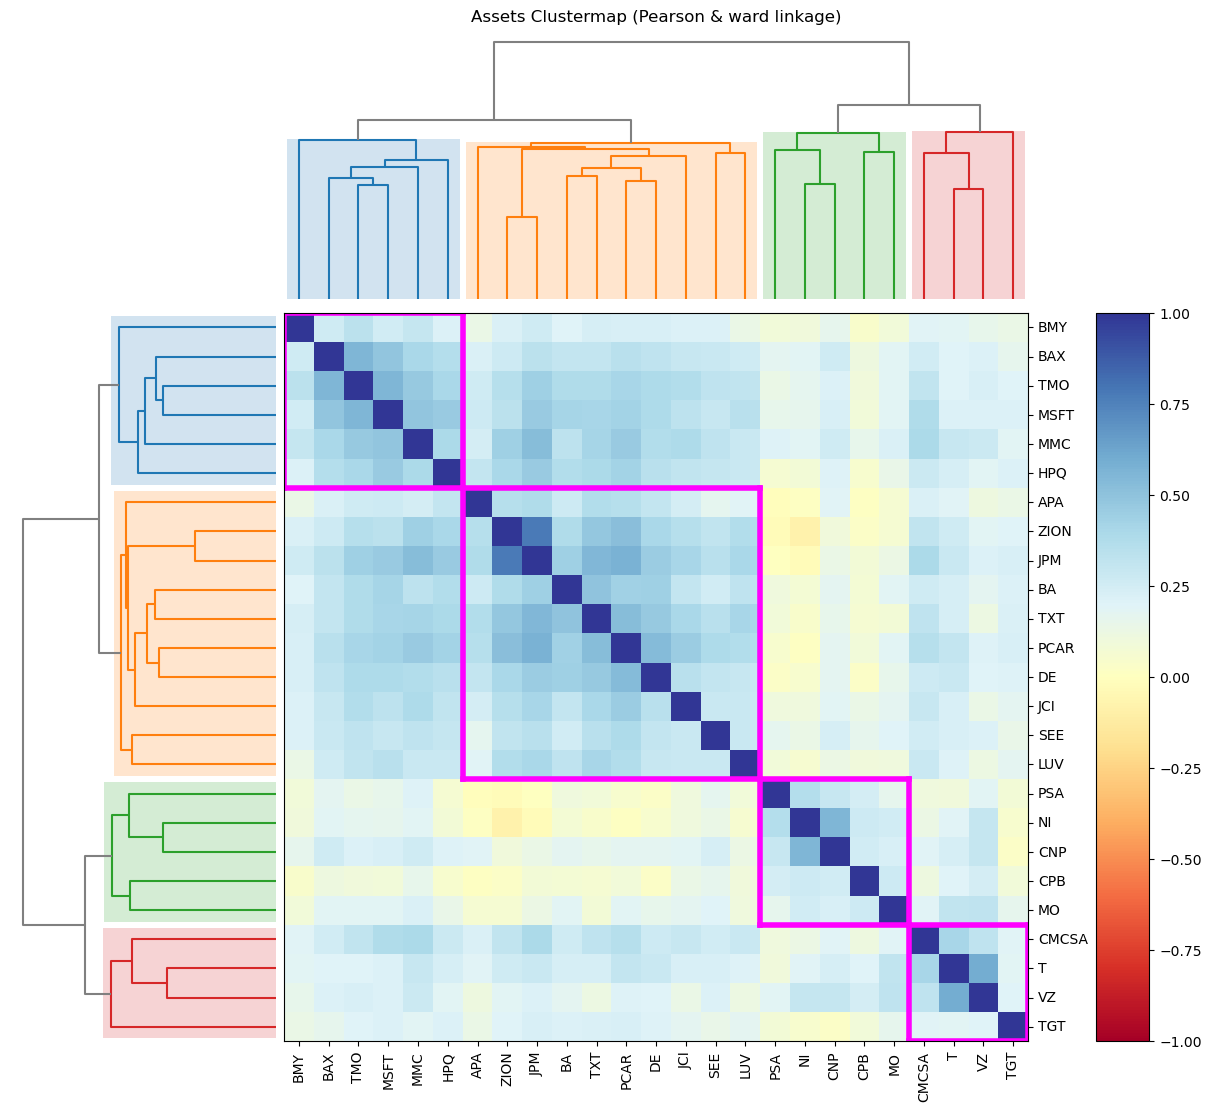

In [3]:
import riskfolio as rp

# Plotting Assets Clusters

ax = rp.plot_clusters(returns=Y,
                      codependence='pearson',
                      linkage='ward',
                      k=None,
                      max_k=10,
                      leaf_order=True,
                      dendrogram=True,
                      #linecolor='tab:purple',
                      ax=None)

The graph above suggest that optimal number of clusters are four.

## 2. Estimating NCO Portfolio

This is the original model proposed by López de Prado (2019). Riskfolio-Lib expand this model to 13 risk measures and for objective functions: "Minimize Risk", "Maximize Utility Function", "Maximize Return/Risk Ratio" and "Equal Risk Contribution".

### 2.1 Calculating the NCO portfolio

In [4]:
# Building the portfolio object
port = rp.HCPortfolio(returns=Y)

# Estimate optimal portfolio:

model='NCO' # Could be HRP, HERC or NCO
codependence = 'pearson' # Correlation matrix used to group assets in clusters
method_cov = 'hist' # Covariance estimation technique
obj = "MinRisk" # Posible values are "MinRisk", "Utility", "Sharpe" and "ERC"
rm = 'MV' # Risk measure used, this time will be variance
rf = 0 # Risk free rate
l = 2 # Risk aversion factor, only usefull with "Utility" objective
linkage = 'ward' # Linkage method used to build clusters
max_k = 10 # Max number of clusters used in two difference gap statistic
leaf_order = True # Consider optimal order of leafs in dendrogram

w = port.optimization(model=model,
                      codependence=codependence,
                      method_cov=method_cov,
                      obj=obj,
                      rm=rm,
                      rf=rf,
                      l=l,
                      linkage=linkage,
                      max_k=max_k,
                      leaf_order=leaf_order)

display(w.T)

,APA,BA,BAX,BMY,CMCSA,CNP,CPB,DE,HPQ,JCI,...,NI,PCAR,PSA,SEE,T,TGT,TMO,TXT,VZ,ZION
weights,0.0000%,1.1729%,5.1826%,2.8237%,5.0009%,10.9742%,3.7079%,0.7664%,0.3471%,2.4531%,...,7.0047%,0.1995%,12.0255%,2.2920%,4.8849%,3.0260%,1.1106%,0.0000%,8.6249%,0.0000%


### 2.2 Plotting portfolio composition

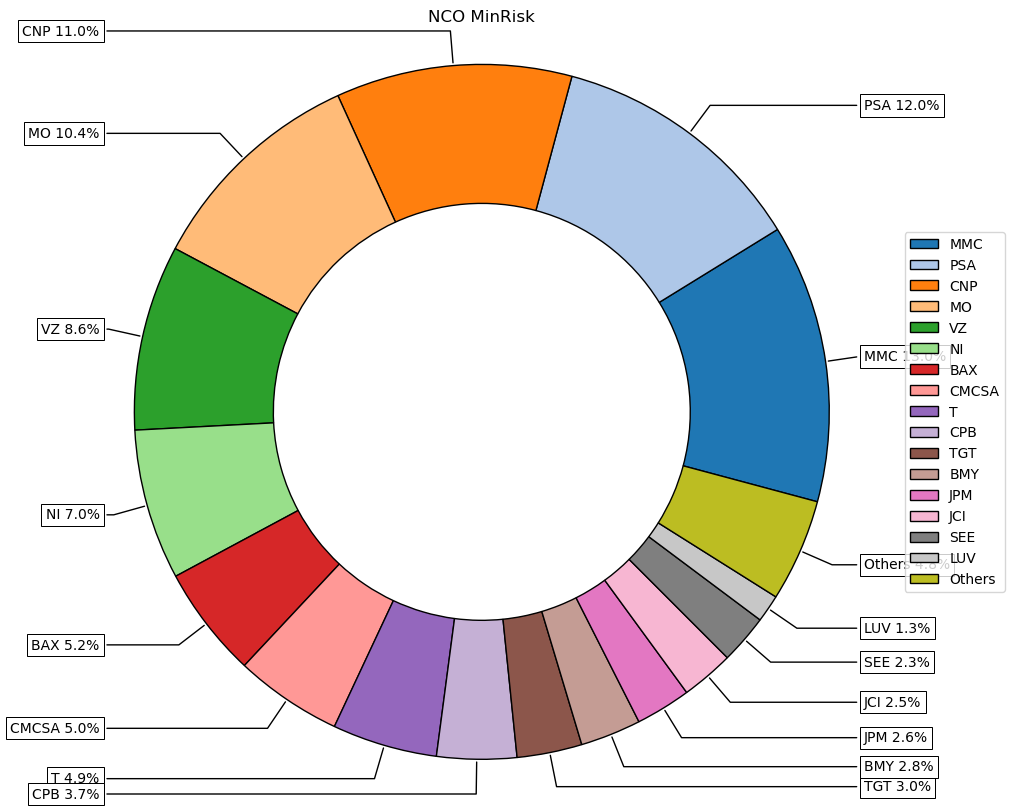

In [5]:
# Plotting the composition of the portfolio

ax = rp.plot_pie(w=w,
                 title='NCO MinRisk',
                 others=0.05,
                 nrow=25,
                 cmap="tab20",
                 height=8,
                 width=10,
                 ax=None)

### 2.3 Plotting Risk Contribution

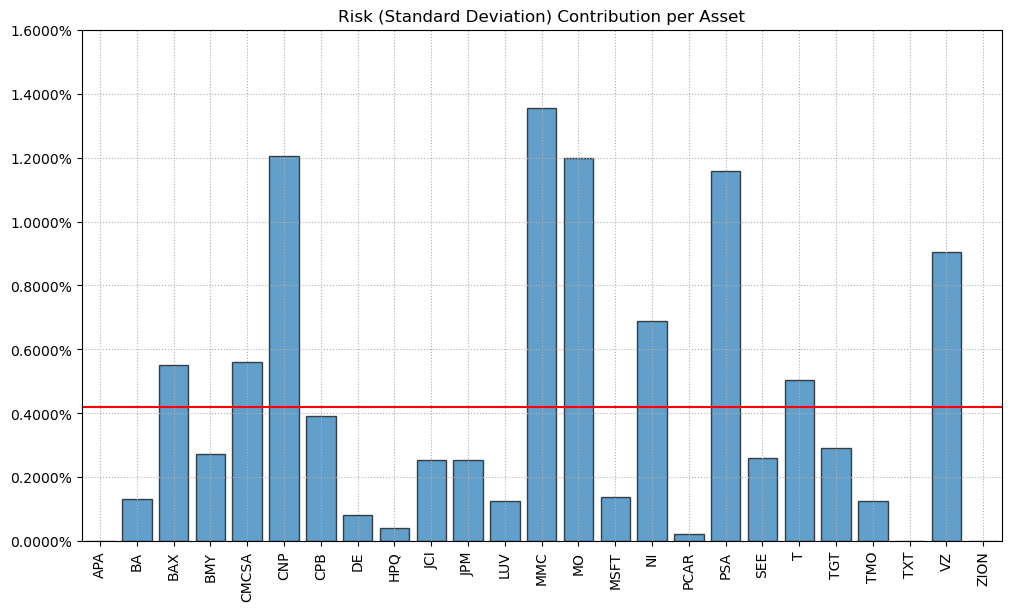

In [6]:
# Plotting the risk contribution per asset

mu = Y.mean()
cov = Y.cov() # Covariance matrix
returns = Y # Returns of the assets

ax = rp.plot_risk_con(w=w,
                      cov=cov,
                      returns=returns,
                      rm=rm,
                      rf=0,
                      alpha=0.05,
                      color="tab:blue",
                      height=6,
                      width=10,
                      t_factor=252,
                      ax=None)

### 2.4 Calculate Optimal NCO Portfolios for Several Risk Measures

In [7]:
# Risk Measures available:
#
# 'MV': Variance.
# 'MAD': Mean Absolute Deviation.
# 'MSV': Semi Standard Deviation.
# 'FLPM': First Lower Partial Moment (Omega Ratio).
# 'SLPM': Second Lower Partial Moment (Sortino Ratio).
# 'CVaR': Conditional Value at Risk.
# 'EVaR': Entropic Value at Risk.
# 'WR': Worst Realization (Minimax)
# 'MDD': Maximum Drawdown of uncompounded cumulative returns (Calmar Ratio).
# 'ADD': Average Drawdown of uncompounded cumulative returns.
# 'CDaR': Conditional Drawdown at Risk of uncompounded cumulative returns.
# 'EDaR': Entropic Drawdown at Risk of uncompounded cumulative returns.
# 'UCI': Ulcer Index of uncompounded cumulative returns.

rms = ['MV', 'MAD', 'MSV', 'FLPM', 'SLPM',
       'CVaR', 'EVaR', 'WR', 'MDD', 'ADD',
       'CDaR', 'EDaR', 'UCI']

w_s = pd.DataFrame([])

for i in rms:
    w = port.optimization(model=model,
                          codependence=codependence,
                          method_cov=method_cov,
                          obj=obj,
                          rm=i,
                          rf=rf,
                          linkage=linkage,
                          max_k=max_k,
                          leaf_order=leaf_order)

    w_s = pd.concat([w_s, w], axis=1)
    
w_s.columns = rms

In [8]:
w_s.style.format("{:.2%}").background_gradient(cmap='YlGn')

,MV,MAD,MSV,FLPM,SLPM,CVaR,EVaR,WR,MDD,ADD,CDaR,EDaR,UCI
APA,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
BA,1.17%,1.61%,0.67%,1.58%,0.64%,0.14%,0.00%,0.00%,4.28%,2.17%,0.86%,2.72%,0.00%
BAX,5.18%,4.84%,4.73%,6.09%,5.19%,4.79%,8.19%,0.00%,0.00%,10.85%,6.00%,3.13%,8.26%
BMY,2.82%,3.26%,2.52%,2.79%,2.38%,1.81%,6.25%,0.00%,0.00%,0.60%,0.00%,0.87%,0.41%
CMCSA,5.00%,5.21%,4.54%,5.40%,4.72%,2.94%,0.49%,0.00%,0.71%,3.36%,0.00%,0.00%,0.11%
CNP,10.97%,9.44%,11.69%,9.96%,11.93%,15.62%,13.49%,0.00%,29.30%,9.69%,18.59%,24.26%,17.15%
CPB,3.71%,3.20%,5.47%,2.39%,5.16%,6.55%,6.27%,2.83%,0.00%,0.00%,0.03%,0.00%,0.00%
DE,0.77%,1.02%,0.59%,1.03%,0.61%,0.10%,0.00%,0.00%,12.76%,0.63%,1.16%,7.23%,0.00%
HPQ,0.35%,0.58%,0.00%,0.68%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
JCI,2.45%,2.77%,1.89%,2.26%,1.54%,0.28%,0.00%,0.00%,0.00%,1.45%,0.23%,0.00%,0.00%


<Axes: >

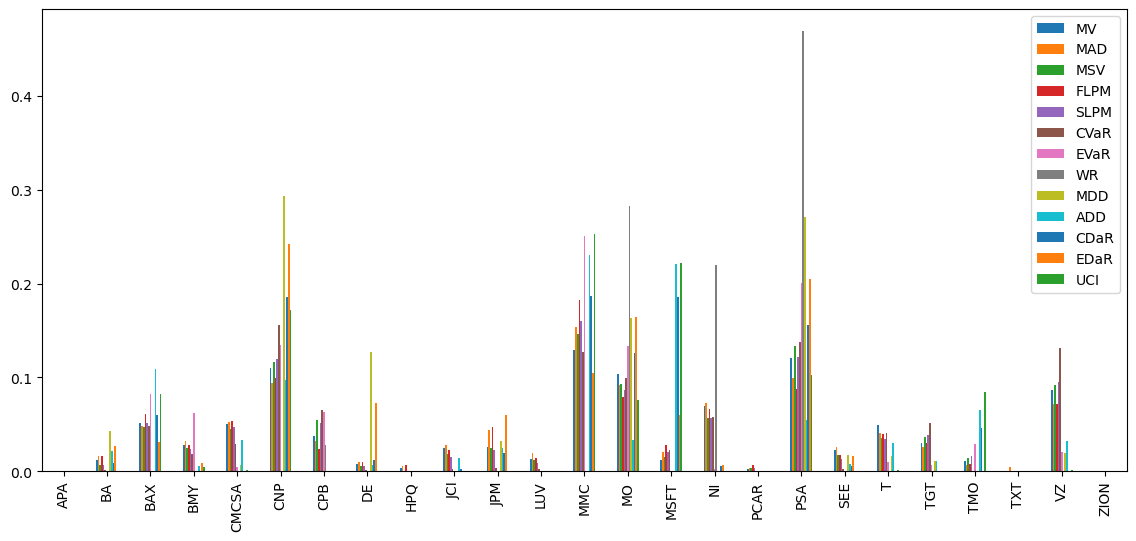

In [9]:
import matplotlib.pyplot as plt

# Plotting a comparison of assets weights for each portfolio

fig = plt.gcf()
fig.set_figwidth(14)
fig.set_figheight(6)
ax = fig.subplots(nrows=1, ncols=1)

w_s.plot.bar(ax=ax)